Hi Kimin! 

Mandi here, thank you for taking out time for this!

#### A litlte overview of settings:
- We want to train a procgen agent for just one game, "fruitbot", but on a limited amount of avaliable levels, then test the trained agent's performance on some other **unseen** levels



- Since we are limited in compute, all the current agents are trained with only 200k~500k total timesteps 



- For all agent/experiments below, only 50 levels, indexed 0-50, was avaliable to the agent during training; to test generalization, we still make avaliable 50 levels in the game env, but instead with index 50-100, 100-150, etc. (i.e. unseen levels)



- The code I used are largely copy-paste (:p) with small adjustments, please see https://github.com/MandiZhao/train-procgen/tree/master/train_procgen if there's details you'd like to check

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from os.path import join
from plot_utils import plot_compare_runs, plot_compare_agents

First, here is the reward and losses history for the randomized agent's training run, which took


**500k** total timesteps on **64** parallel procgen envs

code: https://github.com/MandiZhao/train-procgen/blob/master/train_procgen/train_random.py

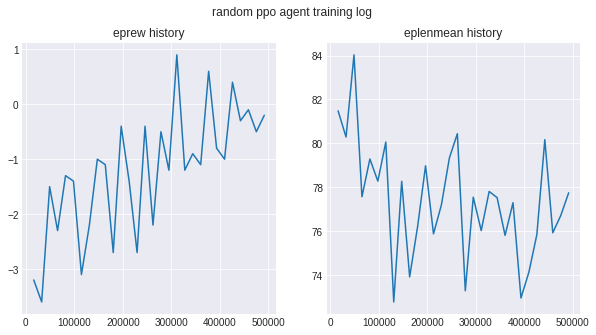

In [4]:
plot_compare_runs(log_dir='log/random_log/train')

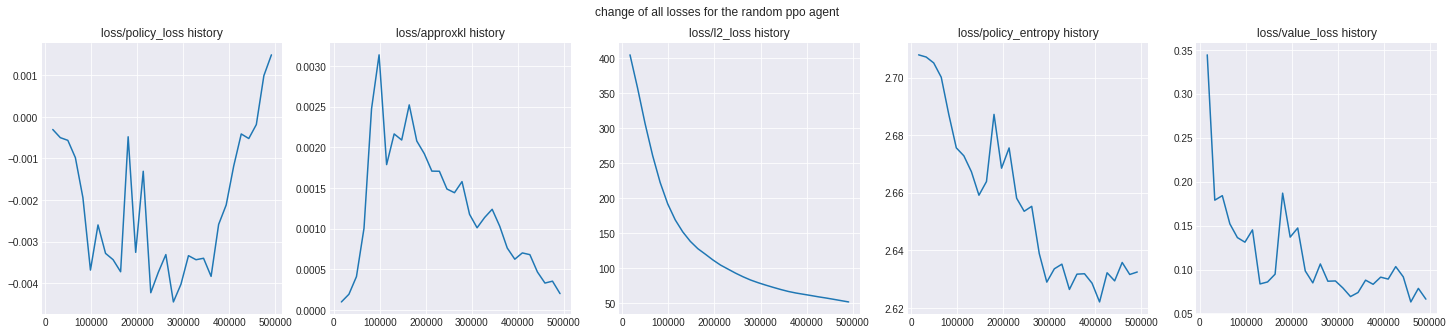

In [10]:
losses = ["loss/"+l for l in 
          ['policy_loss','approxkl', "l2_loss", "policy_entropy",'value_loss']]
title="change of all losses for the random ppo agent"
plot_compare_runs(keys=losses[:], title=title)

To compare with baseline, I trained an vanilla ppo agent using baselines.ppo2 with the same total_time_step=500k, num_env=64 setting. 

Code here: https://github.com/MandiZhao/train-procgen/blob/master/train_procgen/train.py
Due to some silly mistake on my end, the vanilla training log is lost for now (I'll train a new one soon), but training reward history looked pretty similar to random agent training.

In [ ]:
## Missing plot here :(

Then, I saved all model params for both agents (basic and randomized) at the end of their training runs, load it back in the testing script I wrote, and recored agent performance on different unseen levels.

For randomized agent, I always set **clean_flag=1** when testing
Code here: 

https://github.com/MandiZhao/train-procgen/blob/master/train_procgen/test_random.py


https://github.com/MandiZhao/train-procgen/blob/master/train_procgen/test_vanilla.py

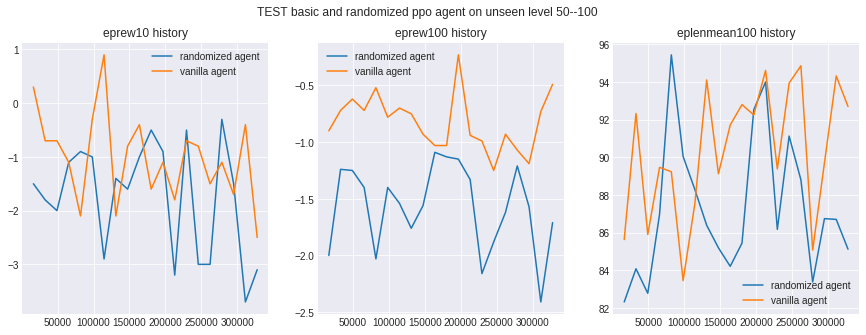

In [16]:
import json
dirs = ["log/random_log/test/", 'log/vanilla/test/']
ids = [0 for _ in dirs]

paths = [join(_dir, "args_run_{}.json".format(str(_id).zfill(2))) for _dir, _id in zip(dirs, ids)]
with open(paths[0], 'r') as json_file1:
    json_object1 = json.load(json_file1)
with open(paths[1], 'r') as json_file2:
    json_object2 = json.load(json_file2)
assert json_object1["start_level"] == json_object2["start_level"]
start = json_object1["start_level"]
end = start + json_object1["num_levels"]
plot_compare_agents(log_dirs=dirs, run_ids=ids, \
                    legends=["randomized agent", "vanilla agent"],
                  keys=['eprew10', 'eprew100', 'eplenmean100'],\
                  title="TEST basic and randomized ppo agent on unseen level {}--{}".format(start, end))

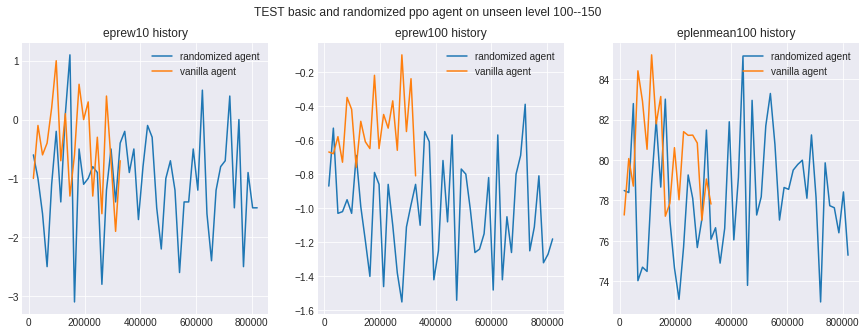

In [17]:
ids = [1 for _ in dirs]
paths = [join(_dir, "args_run_{}.json".format(str(_id).zfill(2))) for _dir, _id in zip(dirs, ids)]
with open(paths[0], 'r') as json_file1:
    json_object1 = json.load(json_file1)
with open(paths[1], 'r') as json_file2:
    json_object2 = json.load(json_file2)
assert json_object1["start_level"] == json_object2["start_level"]
start = json_object1["start_level"]
end = start + json_object1["num_levels"]
plot_compare_agents(log_dirs=dirs, run_ids=ids, \
                    legends=["randomized agent", "vanilla agent"],
                  keys=['eprew10', 'eprew100', 'eplenmean100'],\
                  title="TEST basic and randomized ppo agent on unseen level {}--{}".format(start, end))

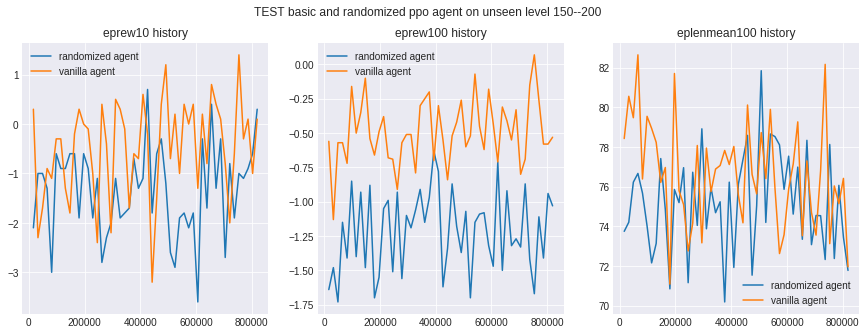

In [18]:
ids = [2 for _ in dirs]
paths = [join(_dir, "args_run_{}.json".format(str(_id).zfill(2))) for _dir, _id in zip(dirs, ids)]
with open(paths[0], 'r') as json_file1:
    json_object1 = json.load(json_file1)
with open(paths[1], 'r') as json_file2:
    json_object2 = json.load(json_file2)
assert json_object1["start_level"] == json_object2["start_level"]
start = json_object1["start_level"]
end = start + json_object1["num_levels"]
plot_compare_agents(log_dirs=dirs, run_ids=ids, \
                    legends=["randomized agent", "vanilla agent"],
                  keys=['eprew10', 'eprew100', 'eplenmean100'],\
                  title="TEST basic and randomized ppo agent on unseen level {}--{}".format(start, end))

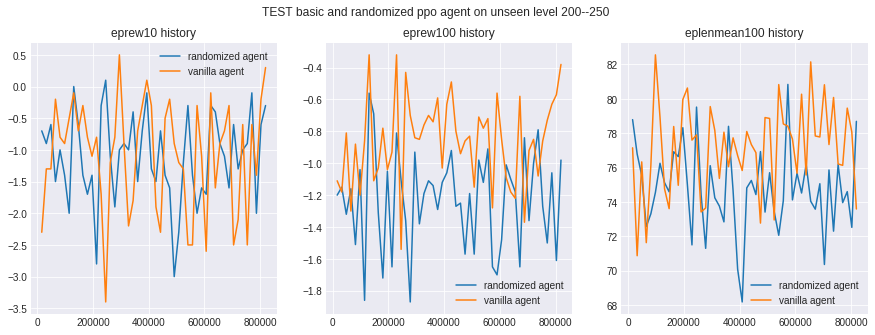

In [19]:
ids = [3 for _ in dirs]
paths = [join(_dir, "args_run_{}.json".format(str(_id).zfill(2))) for _dir, _id in zip(dirs, ids)]
with open(paths[0], 'r') as json_file1:
    json_object1 = json.load(json_file1)
with open(paths[1], 'r') as json_file2:
    json_object2 = json.load(json_file2)
assert json_object1["start_level"] == json_object2["start_level"]
start = json_object1["start_level"]
end = start + json_object1["num_levels"]
plot_compare_agents(log_dirs=dirs, run_ids=ids, \
                    legends=["randomized agent", "vanilla agent"],
                  keys=['eprew10', 'eprew100', 'eplenmean100'],\
                  title="TEST basic and randomized ppo agent on unseen level {}--{}".format(start, end))

Note above "eprew10" and "eprew100" are mean rewards from the last 10 and last 100 episodes, respectively. 


As you can see above, the randomized agent doesn't show out-performance, and looks like it's even worse at unseen levels than the vanilla agent, which I find really strange.

### Finally, questions and discussions:

Oof that was quite some plots! 

My biggest question now is (naturally) to figure out the reason for this underperformance of randomized agent. I read the paper a couple of times and thought the idea was pretty straightforwad and intuitively should work well. Additionally I'm pretty sure the game coinrun, which your paper tested on, is pretty similar to other procgen games in terms of env settings. And since we are training in "easy" mode for fruitbot, it should take even faster to learn.


One sanity check is to use random_ppo but always set clean_flag=1, i.e. no pertubation at all, and see if we get an agent closely to baseline ppo.
Right now, the training performance of this sanity-check agent seem to be closer to baseline ppo, but testing performance on unseen levels is still worse than vanilla ppo: I think this sugguests there's definately something wrong?

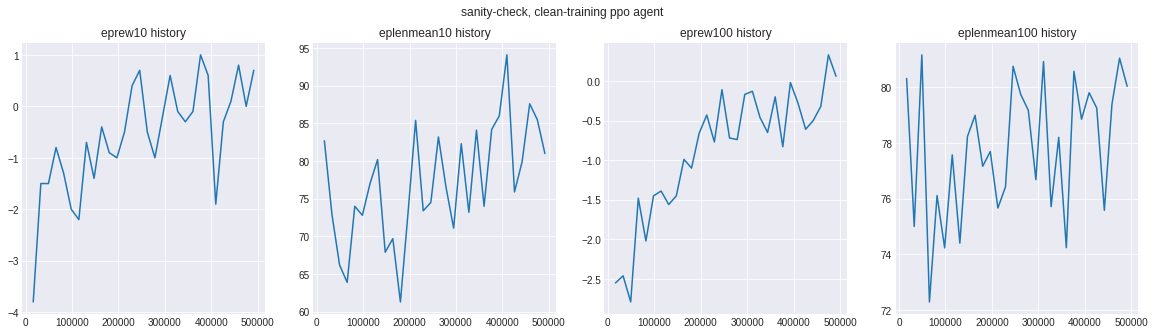

In [39]:
plot_compare_runs(log_dir='log/random_log/train', run_ids=[9], 
                  keys=['eprew10','eplenmean10','eprew100','eplenmean100'],
                 title="sanity-check, clean-training ppo agent")

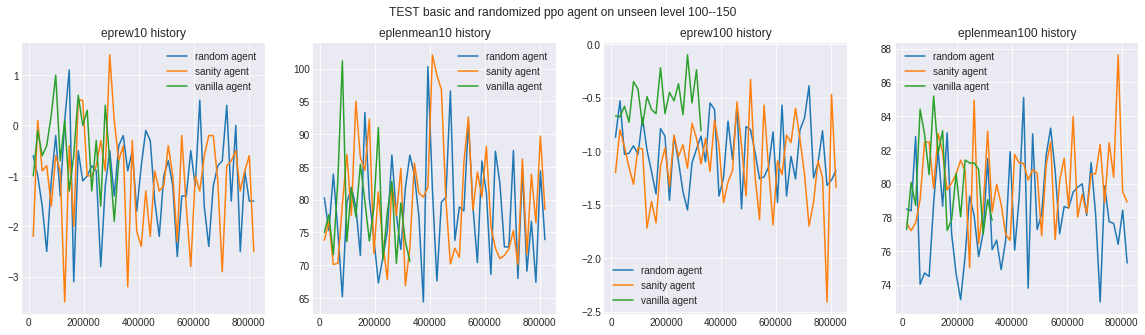

In [40]:
dirs = ["log/random_log/test/","log/random_log/test/", 'log/vanilla/test/']
ids = [1,10,1]
paths = [join(_dir, "args_run_{}.json".format(str(_id).zfill(2))) for _dir, _id in zip(dirs, ids)]
with open(paths[0], 'r') as json_file1:
    json_object1 = json.load(json_file1)
with open(paths[1], 'r') as json_file2:
    json_object2 = json.load(json_file2)
assert json_object1["start_level"] == json_object2["start_level"]
start = json_object1["start_level"]
end = start + json_object1["num_levels"]
plot_compare_agents(log_dirs=dirs, run_ids=ids, \
                    legends=["random agent","sanity agent", "vanilla agent"],
                  keys=['eprew10', 'eplenmean10','eprew100', 'eplenmean100'],\
                  title="TEST basic and randomized ppo agent on unseen level {}--{}".format(start, end))

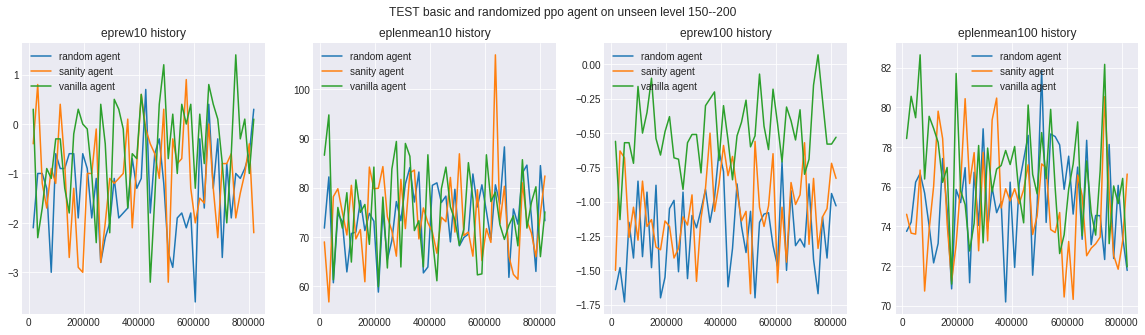

In [42]:
ids = [2,11,2]
paths = [join(_dir, "args_run_{}.json".format(str(_id).zfill(2))) for _dir, _id in zip(dirs, ids)]
with open(paths[0], 'r') as json_file1:
    json_object1 = json.load(json_file1)
with open(paths[1], 'r') as json_file2:
    json_object2 = json.load(json_file2)
assert json_object1["start_level"] == json_object2["start_level"]
start = json_object1["start_level"]
end = start + json_object1["num_levels"]
plot_compare_agents(log_dirs=dirs, run_ids=ids, \
                    legends=["random agent","sanity agent", "vanilla agent"],
                  keys=['eprew10', 'eplenmean10','eprew100', 'eplenmean100'],\
                  title="TEST basic and randomized ppo agent on unseen level {}--{}".format(start, end))

### Something else I did:

is to use the same random_ppo code, set clean_flag=1, and try out some other data augmentation ideas, see

https://github.com/MandiZhao/train-procgen/blob/master/train_procgen/recenter_ppo.py

https://arxiv.org/pdf/2001.09908.pdf

This agent, which essentially was trained only on the clean/unpertubed inputs with same network structure as random_ppo, suprisingly outperforms baseline vanilla ppo in BOTH training and generilizing:

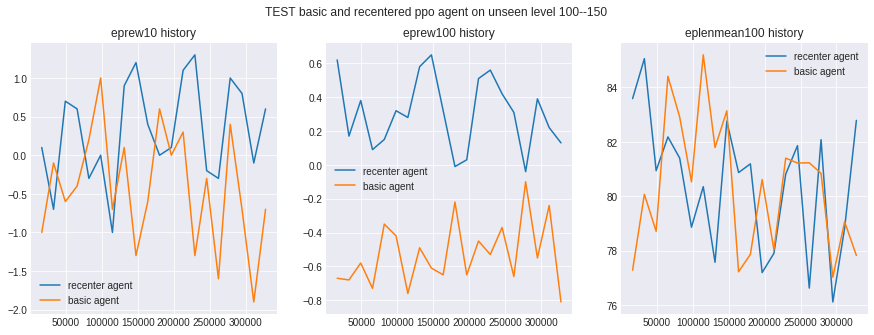

In [20]:
dirs = ["log/recenter/test/", 'log/vanilla/test/']
ids = [1,1]
paths = [join(_dir, "args_run_{}.json".format(str(_id).zfill(2))) for _dir, _id in zip(dirs, ids)]
with open(paths[0], 'r') as json_file1:
    json_object1 = json.load(json_file1)
with open(paths[1], 'r') as json_file2:
    json_object2 = json.load(json_file2)
assert json_object1["num_levels"] ==  json_object2["num_levels"]
assert json_object1["start_level"] == json_object2["start_level"]
start = json_object1["start_level"]
end = start + json_object1["num_levels"]
plot_compare_agents(log_dirs=dirs, run_ids=ids, \
                    legends=["recenter agent", "basic agent"],
                  keys=['eprew10', 'eprew100', 'eplenmean100'],\
                  title="TEST basic and recentered ppo agent on unseen level {}--{}".format(start, end))

### Above plots the testing time performance for both agents.

I think this shows that the random_ppo code I used should largely be OK, only the perturbation part is the problem. 
(p.s. this "recenter" agent used a simple input shifting method to make the observations "agent-centric", and I think it compliments to pure randomization on the original frames, would love to discuss more about this if you are interested!)

### Back to why the randomized agent isn't doing well: 

One potential reason I can think of is that, your paper used this threshold probability of 0.1 to do perturbed training, which means 90% of the time the agent is still training on original inputs. And since our compute is only limited to 500k, the randomized inputs could have only negative effect on learning?


You would know the implementation details much better than I am, so there could be other things I overlooked (or even stupid mistakes..) -- please let me know if there's anything you'd sugguest to look at, or any debugging methods to poke at this issue, I'd really appreciate it!


Thanks so much for your time! 